<a href="https://colab.research.google.com/github/Stud-proekt/GIS-Colab/blob/main/Folium_Vrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import folium
import pandas as pd
import unicodedata
import json

# Статические переменные
region_name_incsv = 'воронежская область' # Указать область
region_center_incsv = [51.67, 39.18] # Указать центр области

# Загрузка данных о ТЕКУЩЕМ населении из CSV с поддержкой кириллицы
data_2020 = pd.read_csv('/content/drive/MyDrive/Colab/voronezh_data_2020.csv', skiprows=5, header=None, sep=';', encoding='windows-1251')  # или encoding='cp1251'
data_2020.columns = ['region', 'total_population', 'male_population', 'female_population', 'male_percent', 'female_percent']
data_2020 = data_2020.dropna(subset=['region'])  # Удаляем пустые строки
data_2020['region'] = data_2020['region'].str.strip()  # Удаляем лишние пробелы
data_2020['region'] = data_2020['region'].str.lower()  # Приводим все значения к нижнему регистру

# Фильтруем данные для Воронежской области и её районов
def filter_data(data):
  voronezh_data = []
  collecting_voronezh = False

  for _, row in data.iterrows():
      if row['region'] == region_name_incsv.lower():  # Начинаем собирать данные при нахождении "воронежская область"
          collecting_voronezh = True
          # # Добавляем данные самой области
          # voronezh_data.append({
          #     'region': row['region'],
          #     'total_population': row['total_population'],
          #     'male_population': row['male_population'],
          #     'female_population': row['female_population']
          # })
          continue

      if collecting_voronezh:
          if 'район' in row['region'] or 'городской округ' in row['region'] or 'г.' in row['region']:  # Берём только районы и городские округа
              voronezh_data.append({
                  'region': row['region'],
                  'total_population': row['total_population'],
                  'male_population': row['male_population'],
                  'female_population': row['female_population']
              })
          elif row['region'].endswith('область') or row['region'].endswith('край'):  # Останавливаемся при следующей области
              break

  return voronezh_data

# Преобразуем список словарей в DataFrame
voronezh_data_2020 = pd.DataFrame(filter_data(data_2020)).set_index('region')
voronezh_data_2020['total_population'] = voronezh_data_2020['total_population'].astype(str).str.replace(' ', '').astype(float)
print(voronezh_data_2020.index.tolist(), '\n', len(voronezh_data_2020.index.tolist()))

['городской округ - город воронеж - городское население - г. воронеж', 'борисоглебский городской округ', 'городское население - г. борисоглебск', 'городской округ - город нововоронеж - городское население - г. нововоронеж', 'аннинский муниципальный район', 'бобровский муниципальный район', 'городское население - г. бобров', 'богучарский муниципальный район', 'городское поселение - город богучар - городское население - г. богучар', 'бутурлиновский муниципальный район', 'городское население - г. бутурлиновка', 'верхнемамонский муниципальный район - сельское население', 'верхнехавский муниципальный район - сельское население', 'воробьёвский муниципальный район - сельское население', 'грибановский муниципальный район', 'калачеевский муниципальный район', 'городское население - г. калач', 'каменский муниципальный район', 'кантемировский муниципальный район', 'каширский муниципальный район - сельское население', 'лискинский муниципальный район', 'городское население - г. лиски', 'нижнедевицк

In [ ]:
# Загрузка данных за 2010 год
data_2010 = pd.read_csv('/content/drive/MyDrive/Colab/voronezh_data_2010.csv', skiprows=5, header=None, sep=';', encoding='windows-1251')
data_2010.columns = ['region', 'total_population', 'male_population', 'female_population', 'male_percent', 'female_percent', '']
data_2010['region'] = data_2010['region'].str.strip().str.lower()
voronezh_data_2010 = pd.DataFrame(filter_data(data_2010)).set_index('region')
print(voronezh_data_2010.index.tolist(), '\n', len(voronezh_data_2010.index.tolist()))

# Загрузка данных за 2002 год
data_2002 = pd.read_csv('/content/drive/MyDrive/Colab/voronezh_data_2002.csv', skiprows=5, header=None, sep=';', encoding='windows-1251')
data_2002.columns = ['id', 'number', 'region', 'total_population', 'male_population', 'female_population', 'male_percent', 'female_percent']
data_2002['region'] = data_2002['region'].str.strip().str.lower()
voronezh_data_2002 = pd.DataFrame(filter_data(data_2002)).set_index('region')
print(voronezh_data_2002.index.tolist(), '\n', len(voronezh_data_2002.index.tolist()))

regions_2020 = voronezh_data_2020.index.tolist()
regions_2010 = voronezh_data_2010.index.tolist()
regions_2002 = voronezh_data_2002.index.tolist()

['г. воронеж с подчиненными его администрации населенными пунктами', 'г. воронеж', 'городские районы', 'г. борисоглебск', 'г. лиски с подчиненными его администрации населенными пунктами', 'городское население - г. лиски', 'г. нововоронеж', 'г. острогожск с подчиненными его администрации населенными пунктами', 'городское население - г. острогожск', 'г. поворино', 'г. россошь', 'аннинский район', 'бобровский район', 'городское население - г. бобров (рц)', 'богучарский район', 'городское население - г. богучар (рц)', 'борисоглебский район - сельское население', 'бутурлиновский район', 'г. бутурлиновка (рц)', 'верхнемамонский район - сельское население', 'верхнехавский район - сельское население', 'воробьевский район - сельское население', 'грибановский район', 'калачеевский район', 'городское население - г. калач (рц)', 'каменский район', 'кантемировский район', 'каширский район - сельское население', 'лискинский район', 'нижнедевицкий район - сельское население', 'новоусманский район - с

In [ ]:
# Загрузка GeoJSON файла с границами районов
with open('/content/drive/MyDrive/Colab/Voronezh_region.geojson', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

geojson_voronezh = {
    "type": "FeatureCollection",
    "features": [feature for feature in geojson_data['features']]
}

# Создание карты
map_center = region_center_incsv  # Координаты центра области
m = folium.Map(location=map_center, zoom_start=8)

# Нормализация названий районов в DataFrame
def normalize_region_name(name):
    name = name.lower() \
        .replace('городской округ', '') \
        .replace('муниципальный район', '') \
        .replace('сельское население', '') \
        .replace('городское население', '') \
        .replace('г.', '').replace('рц', '').replace('с подчиненными его администрации населенными пунктами', '') \
        .replace('-', '').replace('ё', 'е').strip()
    # Убираем пробелы внутри названий для соответствия формату GeoJSON
    return ''.join(e for e in name if e.isalnum() or e.isspace()).strip()

# Применяем функцию нормализации к индексам DataFrame
voronezh_data_2020.index = [normalize_region_name(region) for region in regions_2020]
voronezh_data_2010.index = [normalize_region_name(region) for region in regions_2010]
voronezh_data_2002.index = [normalize_region_name(region) for region in regions_2002]
print(voronezh_data_2020)

                                                  total_population  \
город воронеж     воронеж                                1057681.0   
борисоглебский                                             70407.0   
борисоглебск                                               60687.0   
город нововоронеж     нововоронеж                          30658.0   
аннинский                                                  36149.0   
бобровский                                                 49371.0   
бобров                                                     20871.0   
богучарский                                                38087.0   
городское поселение  город богучар     богучар             14370.0   
бутурлиновский                                             44139.0   
бутурлиновка                                               24397.0   
верхнемамонский                                            18611.0   
верхнехавский                                              23058.0   
воробьевский        

In [ ]:
# Функционал для создания комбинированной таблицы
normalized_regions_2020 = [normalize_region_name(region) for region in regions_2020]
normalized_regions_2010 = [normalize_region_name(region) for region in regions_2010]
normalized_regions_2002 = [normalize_region_name(region) for region in regions_2002]

def find_matching_region(target, candidates):
    max_similarity = 0
    best_match = None
    for candidate in candidates:
        similarity = len(set(target) & set(candidate)) / len(set(target) | set(candidate))
        if similarity > max_similarity:
            max_similarity = similarity
            best_match = candidate
    return best_match

combined_data = []

for i, region_2020 in enumerate(normalized_regions_2020):
    # Находим соответствующие регионы в 2010 и 2002 годах
    match_2010 = find_matching_region(region_2020, normalized_regions_2010)
    match_2002 = find_matching_region(region_2020, normalized_regions_2002)

    # Находим индексы соответствующих регионов
    index_2010 = normalized_regions_2010.index(match_2010) if match_2010 else None
    index_2002 = normalized_regions_2002.index(match_2002) if match_2002 else None

    # Добавляем данные в словарь
    combined_data.append({
    'region': str(normalized_regions_2020[i]),  # Приводим название региона к строке
    'total_population_2020': float(voronezh_data_2020.iloc[i]['total_population']) if 'total_population' in voronezh_data_2020.columns else None,
    'total_population_2010': float(voronezh_data_2010.iloc[index_2010]['total_population']) if voronezh_data_2010 is not None and index_2010 is not None else None,
    'total_population_2002': float(voronezh_data_2002.iloc[index_2002]['total_population']) if voronezh_data_2002 is not None and index_2002 is not None else None
    })

# Преобразуем список словарей в DataFrame
combined_data_df = pd.DataFrame(combined_data)
print(combined_data_df)

                                              region  total_population_2020  \
0                          город воронеж     воронеж              1057681.0   
1                                     борисоглебский                70407.0   
2                                       борисоглебск                60687.0   
3                  город нововоронеж     нововоронеж                30658.0   
4                                          аннинский                36149.0   
5                                         бобровский                49371.0   
6                                             бобров                20871.0   
7                                        богучарский                38087.0   
8     городское поселение  город богучар     богучар                14370.0   
9                                     бутурлиновский                44139.0   
10                                      бутурлиновка                24397.0   
11                                   верхнемамонский

In [ ]:
# Создание диаграммы для каждого региона
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def create_population_chart(region_name, combined_data_df):
    print('Создание диаграммы для:', region_name)

    # Найдите данные для указанного региона
    region_data = combined_data_df[combined_data_df['region'] == region_name]
    if region_data.empty:
        return None

    years = [2002, 2010, 2020]
    populations = [
        region_data['total_population_2002'].values[0],
        region_data['total_population_2010'].values[0],
        region_data['total_population_2020'].values[0]
    ]

    # Создаем график
    plt.figure(figsize=(3, 2))

    # Добавляем столбчатую диаграмму
    bars = plt.bar(years, populations, color=['blue', 'green', 'red'], alpha=0.6, label='Численность')

    # Добавляем линию, соединяющую точки
    plt.plot(years, populations, color='black', marker='o', linewidth=2, label='Тренд')

    # Добавляем значения над столбцами
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, int(yval), ha='center', va='bottom', fontsize=8)

    # Настройка заголовков и меток
    plt.title(f'Изменение численности населения\n{region_name}', fontsize=10)
    plt.xlabel('Год', fontsize=8)
    plt.ylabel('Численность населения', fontsize=8)
    plt.xticks(years, fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=8)

    # Сохраняем график в памяти
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    plt.close()

    # Возвращаем HTML-код с изображением
    return f'<img src="data:image/png;base64,{image_base64}">'

In [ ]:
# Основная функция стиля для folium.GeoJson
def style_function(feature):
    district_name = feature['properties']['district'].lower().replace(' ', '').replace('район', '').replace('ё', 'е')  # Приводим название района из GeoJSON к нижнему регистру и убираем пробелы
    chart_html = ""
    population = 0
    # Находим наиболее похожее название в DataFrame
    for index in voronezh_data_2020.index:
        normalized_index = index.lower().replace(' ', '')

        # Проверяем, является ли district_name частью normalized_index или наоборот
        if district_name in normalized_index or normalized_index in district_name:
            print("Отношения:", district_name, '<>', normalized_index)
            try:
                population = voronezh_data_2020.loc[index, 'total_population']  # Преобразуем строку в число
                chart_html = create_population_chart(index, combined_data_df)


                break  # Выходим из цикла, так как совпадение найдено
            except KeyError:
                population = 0  # Если данных нет, устанавливаем значение 0

    feature['properties']['total_population'] = population  # Добавляем поле с численностью
    feature['properties']['chart_html'] = chart_html if chart_html else "Данные отсутствуют"

    # Определение цвета в зависимости от численности
    if population != 0 and population < 35000:
        color = 'green'
    elif population < 500000:
        color = 'orange'
    elif population > 500000:
        color = 'red'
    else:
        color = 'grey'

    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.4
    }

In [ ]:
# Заглушка маркер в центре Воронежа
import branca

html = """
    <h1>Сюда можно будет добавить статистику по области</h1>
    """


folium.Marker([51.672, 39.1843], popup=html).add_to(m)

Отношения: аннинский <> аннинский
Создание диаграммы для: аннинский
Отношения: аннинский <> аннинский
Создание диаграммы для: аннинский
Отношения: бобровский <> бобровский
Создание диаграммы для: бобровский
Отношения: богучарский <> богучарский
Создание диаграммы для: богучарский
Отношения: борисоглебский <> борисоглебский
Создание диаграммы для: борисоглебский
Отношения: бутурлиновский <> бутурлиновский
Создание диаграммы для: бутурлиновский
Отношения: верхнемамонский <> верхнемамонский
Создание диаграммы для: верхнемамонский
Отношения: верхнехавский <> верхнехавский
Создание диаграммы для: верхнехавский
Отношения: воробьевский <> воробьевский
Создание диаграммы для: воробьевский
Отношения: грибановский <> грибановский
Создание диаграммы для: грибановский
Отношения: калачеевский <> калачеевский
Создание диаграммы для: калачеевский
Отношения: каменский <> каменский
Создание диаграммы для: каменский
Отношения: кантемировский <> кантемировский
Создание диаграммы для: кантемировский
Отнош


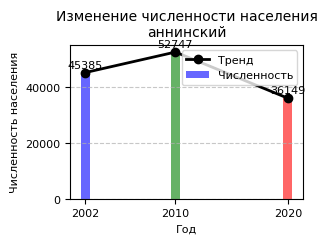
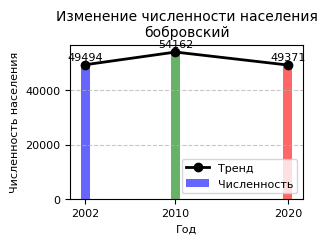
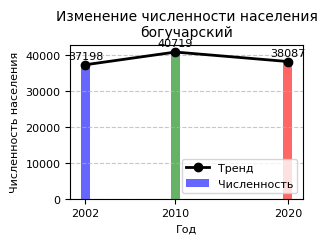
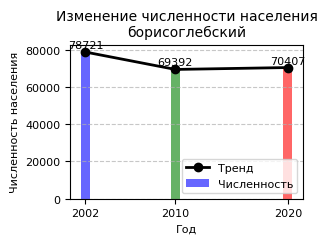
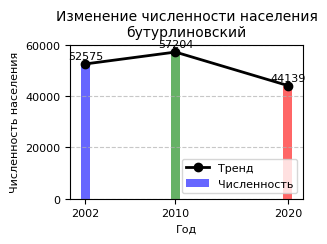
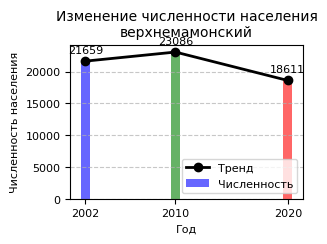
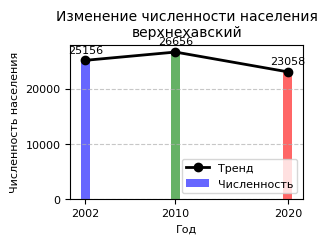
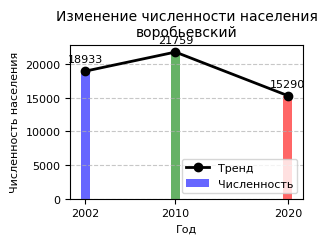
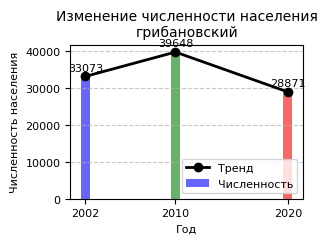
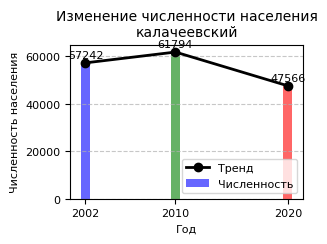
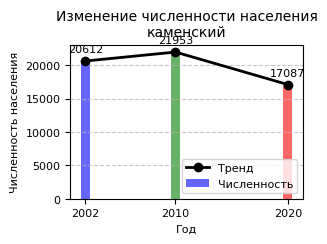
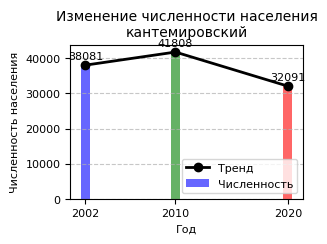
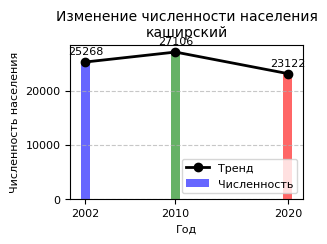
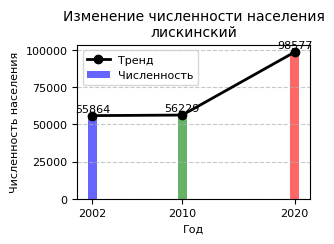
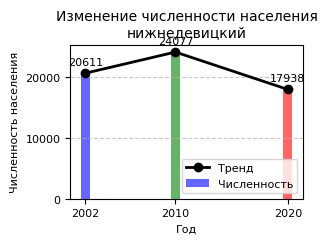
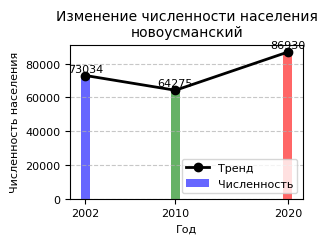
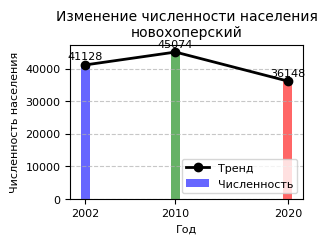
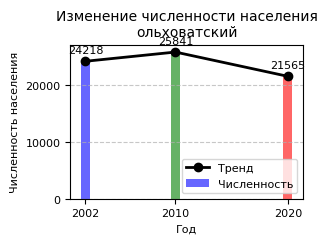
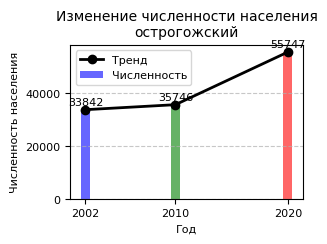
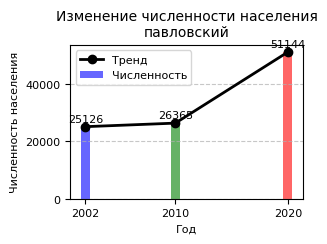
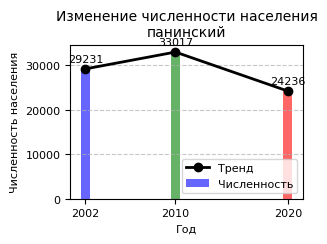
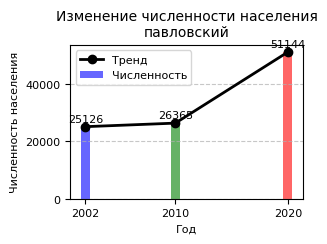
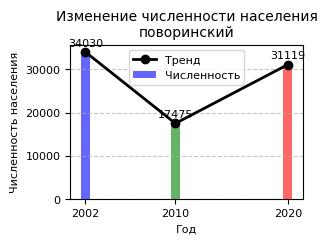
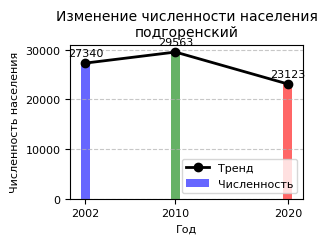
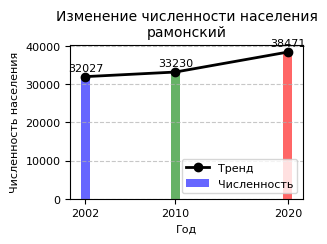
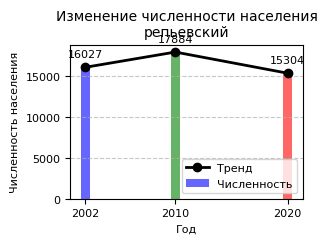
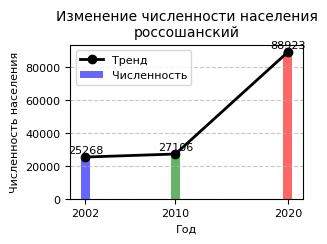
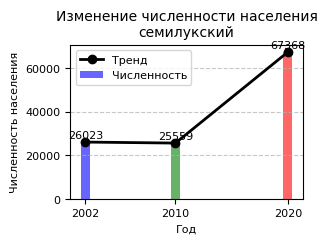
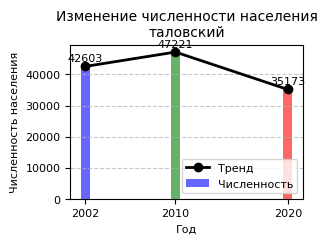
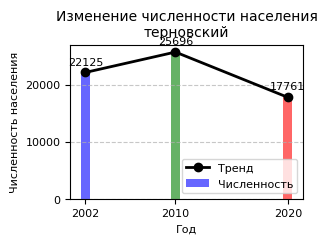
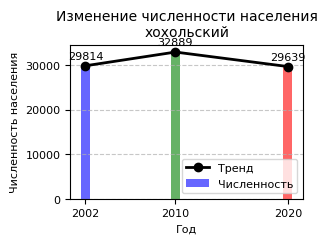
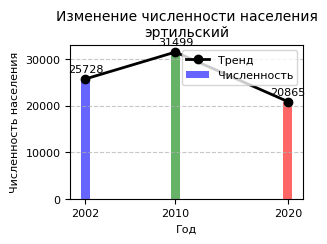
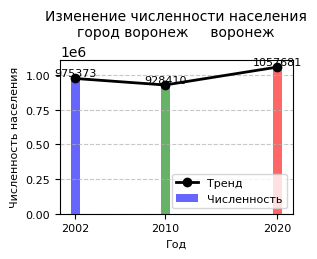
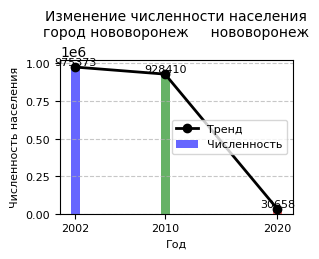

In [ ]:
# Добавление слоя GeoJSON на карту
folium.GeoJson(
    geojson_voronezh,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['district', 'total_population'],  # Добавляем численность населения в подсказку
        aliases=['Район:', 'Численность:'],
        localize=True
    ),
    popup=folium.GeoJsonPopup(
        fields=['district', 'total_population', 'chart_html'],
        aliases=['Район:', 'Численность:', 'Динамика населения:'],
        localize=True,
        labels=True,
        sticky=True,
        max_width=500,
        parse_html=True  # Разрешаем парсинг HTML для отображения графика
    ),
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},  # Увеличение границы при наведении
).add_to(m)

# Сохранение карты
m.save('vrn.html')
# Отображение карты
display(m)